<a href="https://colab.research.google.com/github/sugimotoh/classes/blob/main/%E3%83%A1%E3%83%8B%E3%83%A5%E3%83%BC%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_info = {
    "1Yrtdw8_JqevRHM-rNuPLNL_VVGfvUbHa": "menu",
}

dataframes = {}
# ファイルIDごとに処理
for file_id, df_name in file_info.items():
    url = f'https://drive.google.com/uc?id={file_id}'
    df = pd.read_csv(url)
    dataframes[df_name] = pd.DataFrame(df)

menudata = dataframes["menu"]

In [ ]:
menudata

,ID,YEAR,NAME
0,1,2021,燻製風マヨトリプルベーコン肉厚ビーフ
1,2,2023,焙煎ごま えびフィレオ
2,3,2021,炙り醤油風トリプル肉厚ビーフ
3,4,2021,炙り醤油風トリプル肉厚ビーフ
4,5,2022,炙り醤油風トリプル肉厚ビーフ
...,...,...,...
251,252,2022,赤いガーリックてりやき
252,253,2024,アイコンチキンソルト＆レモン
253,254,2023,N.Y.バッファローチキン
254,255,2023,N.Y.肉厚ビーフ＆ポテト


In [ ]:
!apt-get -y install mecab libmecab-dev mecab-ipadic-utf8
!pip install mecab-python3 unidic-lite

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libmecab-dev is already the newest version (0.996-14build9).
mecab-ipadic-utf8 is already the newest version (2.7.0-20070801+main-3).
mecab is already the newest version (0.996-14build9).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658818 sha256=9c2a58bbfb882488f2a31eb0ce01ad518d5aafd0ab7df4fdfd4bc33ff462cdee
  Stored in directory: /root/.cache/pip/wheels/89/e8/68/f9ac36b8cc6c8b3c96888cd57434abed96595d444f42243853
Successfully built unidic-lite


In [ ]:
import MeCab

# MeCabの初期化
mecab = MeCab.Tagger("-Owakati")

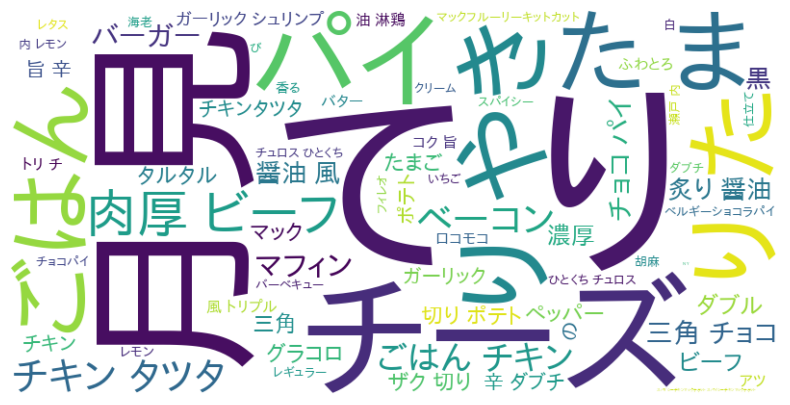

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# NAME列を1つの文字列に結合
text = ' '.join(menudata['NAME'])

# MeCabで分かち書き
mecab = MeCab.Tagger("-Owakati")
wakati_text = mecab.parse(text)

# ワードクラウドの生成
wordcloud = WordCloud(
    font_path='/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf',  # 日本語フォント
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate(wakati_text)

# ワードクラウドの描画
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
